In [1]:
# Insira seu project token aqui

# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='08ec220c-3a69-4c9a-b752-9bea2ae11072', project_access_token='p-d68702731182a32ddab9ea785d18e8b1aa64bb26')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [2]:
!pip install scikit-learn --upgrade

     |████████████████████████████████| 6.8MB 10.2MB/s eta 0:00:01
     |████████████████████████████████| 307kB 40.6MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [3]:
!pip install xgboost --upgrade

     |████████████████████████████████| 148.9MB 52.4MB/s eta 0:00:01  |▊                               | 3.6MB 8.9MB/s eta 0:00:17


In [4]:
!pip install imblearn --upgrade

     |████████████████████████████████| 174kB 7.1MB/s eta 0:00:01


In [5]:
!pip install mlrose

  Stored in directory: /home/dsxuser/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


<hr>

## Download dos conjuntos de dados em formato .csv

In [6]:
import pandas as pd

In [7]:
# Insira aqui o pandasDataFrame.
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6f3018f9e94c4135b15f6eb2687d702a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2Zw3Flptiv6pHpuE8PtUG6uvGBTe-7Fjtm3F6QP1wXtb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_6f3018f9e94c4135b15f6eb2687d702a.get_object(Bucket='desafio06tnt-donotdelete-pr-gggaoyfe4hf4gw',Key='dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
0,000ac62b7850525df9febd4a6706825b,1-d7f0093b99b358f18e06a052f35fac4d,2018-11-28,Sé,-23.5500,-46.6333,193479,29,65,15,7,21,19,25,13,NORMAL,3928
1,000ac62b7850525df9febd4a6706a1f7,1-b56a0d88efa498f5c16027f75a93d8d0,2019-5-28,Tamanduateí,-23.5929,-46.5897,51671,53,20,41,18,9,27,7,22,NORMAL,3388
2,000ac62b7850525df9febd4a67164ffb,1-620af0eb3047aed7ed4d4641e4e59aaa,2019-7-9,Sé,-23.5500,-46.6333,193058,54,47,9,8,18,8,8,13,REABASTECER,4149
3,000ac62b7850525df9febd4a67190c42,1-413129e88bf013fe46dac7c4ca3d72db,2018-10-14,Trianon-Masp,-23.5634,-46.6544,45778,79,58,47,11,34,10,7,41,NORMAL,1724
4,000ac62b7850525df9febd4a671a8e90,1-d7e93a35dacf84903891c0d3dc062233,2018-3-14,Sé,-23.5500,-46.6333,192182,39,19,22,32,20,8,19,16,NORMAL,3674


In [8]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
34929,ffa585d17afd4af1f818b16265ccb25d,1-cff731e53e8e99078ee7a21401a1fcc6,2018-12-28,Eucaliptos,-23.61,-46.6686,24406,76,13,45,10,27,6,5,9,NORMAL,16198
34930,ffa585d17afd4af1f818b16265dadded,1-c20d00c0afef56b9d1a2f981d38061ac,2019-6-16,Eucaliptos,-23.61,-46.6686,25088,68,48,57,27,38,14,17,10,NORMAL,16366
34931,ffa585d17afd4af1f818b16265dc687e,1-20e806c2228116ca691fa9f78ff7a661,2018-12-4,Eucaliptos,-23.61,-46.6686,23517,74,32,18,9,30,37,12,20,NORMAL,16174
34932,ffa585d17afd4af1f818b16265dca3fc,1-64f9a0e6768ab5b2b2c31f628e878961,2018-12-5,Eucaliptos,-23.61,-46.6686,22762,61,30,8,7,28,36,6,14,REABASTECER,16175
34933,ffa585d17afd4af1f818b16265de0bf9,1-06684760c52db71bd3e4141a424a9281,2018-12-18,Eucaliptos,-23.61,-46.6686,23968,11,5,46,4,24,40,36,9,NORMAL,16188


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [9]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34934 entries, 0 to 34933
Data columns (total 17 columns):
_id             34934 non-null object
_rev            34934 non-null object
Tempo           34934 non-null object
Estação         34934 non-null object
LAT             34934 non-null float64
LONG            34934 non-null float64
Movimentação    34934 non-null int64
Original_473    34934 non-null int64
Original_269    34934 non-null int64
Zero            34934 non-null int64
Maçã-Verde      34934 non-null int64
Tangerina       34934 non-null int64
Citrus          34934 non-null int64
Açaí-Guaraná    34934 non-null int64
Pêssego         34934 non-null int64
TARGET          34934 non-null object
row             34934 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 4.5+ MB


In [10]:
df_training_dataset.nunique()

_id             34934
_rev            14958
Tempo             720
Estação            25
LAT                25
LONG               25
Movimentação    13314
Original_473       81
Original_269       65
Zero               63
Maçã-Verde         43
Tangerina          42
Citrus             43
Açaí-Guaraná       42
Pêssego            42
TARGET              2
row             14958
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

In [11]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

from imblearn.over_sampling import SMOTE

smote = SMOTE()

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [13]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

_id             0
_rev            0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

_id             0
_rev            0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [14]:
df_training_dataset_imputed.tail()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
34929,ffa585d17afd4af1f818b16265ccb25d,1-cff731e53e8e99078ee7a21401a1fcc6,2018-12-28,Eucaliptos,-23.61,-46.6686,24406,76,13,45,10,27,6,5,9,NORMAL,16198
34930,ffa585d17afd4af1f818b16265dadded,1-c20d00c0afef56b9d1a2f981d38061ac,2019-6-16,Eucaliptos,-23.61,-46.6686,25088,68,48,57,27,38,14,17,10,NORMAL,16366
34931,ffa585d17afd4af1f818b16265dc687e,1-20e806c2228116ca691fa9f78ff7a661,2018-12-4,Eucaliptos,-23.61,-46.6686,23517,74,32,18,9,30,37,12,20,NORMAL,16174
34932,ffa585d17afd4af1f818b16265dca3fc,1-64f9a0e6768ab5b2b2c31f628e878961,2018-12-5,Eucaliptos,-23.61,-46.6686,22762,61,30,8,7,28,36,6,14,REABASTECER,16175
34933,ffa585d17afd4af1f818b16265de0bf9,1-06684760c52db71bd3e4141a424a9281,2018-12-18,Eucaliptos,-23.61,-46.6686,23968,11,5,46,4,24,40,36,9,NORMAL,16188


In [15]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['_id', '_rev', 'Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'row'], inplace=False)

In [16]:
df_training_dataset_rmcolumns.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
34929,76,13,45,10,27,6,5,9,NORMAL
34930,68,48,57,27,38,14,17,10,NORMAL
34931,74,32,18,9,30,37,12,20,NORMAL
34932,61,30,8,7,28,36,6,14,REABASTECER
34933,11,5,46,4,24,40,36,9,NORMAL


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [17]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Variável a ser aplicado método getDumies()'])
df_training = df_training_dataset_rmcolumns
df_training.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
34929,76,13,45,10,27,6,5,9,NORMAL
34930,68,48,57,27,38,14,17,10,NORMAL
34931,74,32,18,9,30,37,12,20,NORMAL
34932,61,30,8,7,28,36,6,14,REABASTECER
34933,11,5,46,4,24,40,36,9,NORMAL


# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [18]:
df_training.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET'],
      dtype='object')

In [19]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde',
        'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [20]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=133)

In [21]:
X_smote, y_smote = smote.fit_sample(X_train, y_train)

### Treinando uma árvore de decisão

In [22]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=25).fit(X_smote, y_smote)

### Fazendo previsões na amostra de teste

In [23]:
y_pred = dtc.predict(X_test)
print(y_pred)

['NORMAL' 'NORMAL' 'REABASTECER' ... 'NORMAL' 'REABASTECER' 'NORMAL']


### Analisando a qualidade do modelo através da matriz de confusão

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

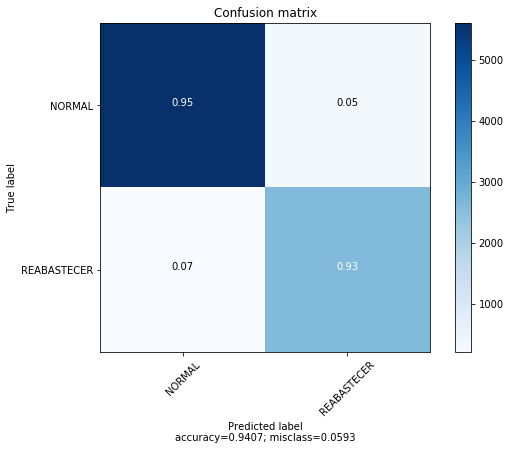

In [25]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [26]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-09 21:52:18--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv’

    [ <=>                                   ] 70,291      --.-K/s   in 0.02s   

2020-09-09 21:52:19 (3.92 MB/s) - ‘to_be_scored.csv’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [27]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [28]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
Tempo           984 non-null object
Estação         984 non-null object
LAT             984 non-null float64
LONG            984 non-null float64
Movimentação    984 non-null int64
Original_473    984 non-null int64
Original_269    984 non-null int64
Zero            984 non-null int64
Maçã-Verde      984 non-null int64
Tangerina       984 non-null int64
Citrus          984 non-null int64
Açaí-Guaraná    984 non-null int64
Pêssego         984 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 100.0+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [29]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,34,65,28,17,33,27,6,2
980,21,60,18,15,27,22,43,43
981,9,56,13,14,21,17,37,37
982,86,49,7,14,17,12,33,33
983,74,41,65,8,14,7,27,27


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [30]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [ ]:
df_to_be_scored_4.columns

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
